In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from textblob import  TextBlob
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
import spacy

In [5]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [7]:
df.drop(['Unnamed: 0','Title'],axis =1 , inplace =True)
df.dropna(inplace = True)
df.isna().sum()

Clothing ID                0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [8]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace('(<br/>)','')
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)','')
    ReviewText = ReviewText.str.replace('(&amp)','')
    ReviewText = ReviewText.str.replace('(&gt)','')
    ReviewText = ReviewText.str.replace('(&lt)','')
    ReviewText = ReviewText.str.replace('\xa0','')
    return ReviewText

df['Review Text'] = preprocess(df['Review Text'])

In [9]:
df['polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['word_count'] = df['Review Text'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['Review Text'].apply(lambda x:len(str(x)))

In [10]:
cl = df.loc[df.polarity == 1, ["Review Text"] ].sample(5).values
for c in cl:
    print(c[0])

This cover-up is perfect for the beach or the pool. it is see through.
This is awesome multi-season dress.
Bought this tank on a whim, but i'm so happy i did! so flattering, comfy and well made.
Beautiful blend of colors and the texture of the shirt is so soft...perfect fall weather garment!
This is so flowing and perfect to hide any flaws.i adore it!


In [13]:
cl = df.loc[df.polarity == 0 , ['Review Text']].sample(5).values
for c in cl:
    print(c[0])

Too pricey for the quality of this imported product.
These jeans are my favorite skinny jeans. they are expensive but so worth it. i had nordstrom reinforce holes with patches so they still look distressed but won't rip further. i wear these at least once a week.
Just buy this dress! the slip, the hem, the print. everything about it!!
I wore this tee under a comfy cardigan on a flight to denver. i received several compliments.
If you have an hourglass figure this dress accentuates your curves. i do need to wear a tank underneath as dress is low cut.


In [14]:
cl = df.loc[df.polarity <= -0.7, ['Review Text']].sample(5).values
for c in cl:
    print(c[0])

Cut out design, no seems or hems.
 very disappointed in retailer
What a disappointment and for the price, it's outrageous!
Received this product with a gaping hole in it. very disappointed in the quality and the quality control at the warehouse
The button fell off when i took it out of the bag, and i noticed that all of the thread had unraveled. will be returning :-(
Awful color, horribly wrinkled and just a mess...so disappointed


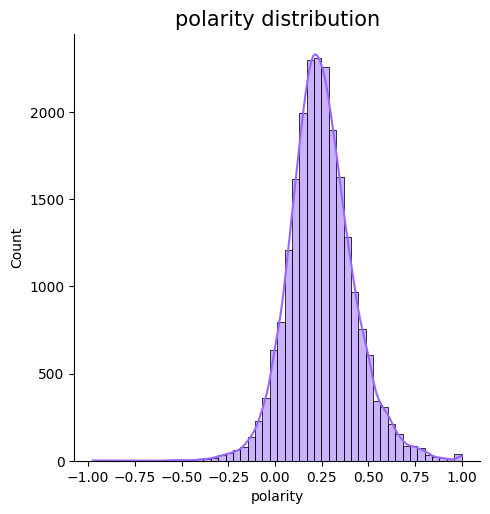

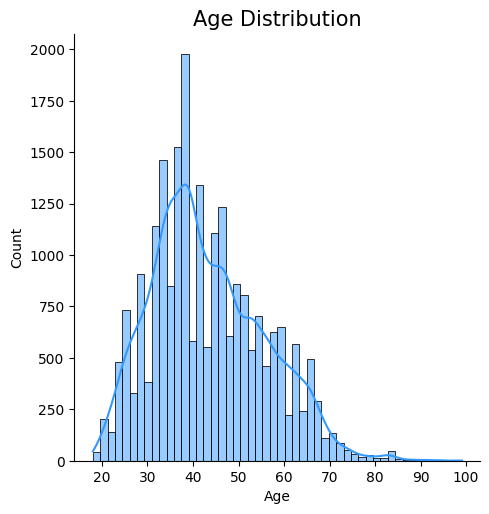

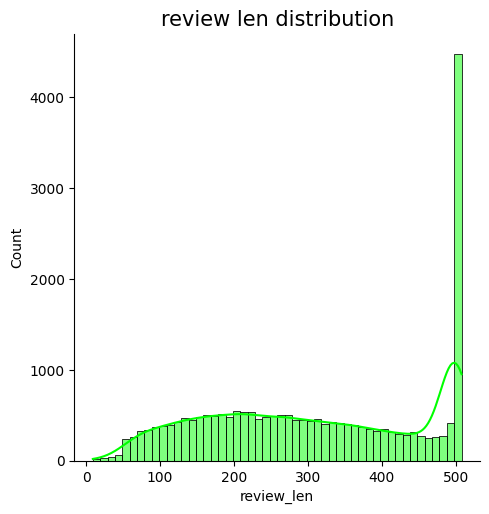

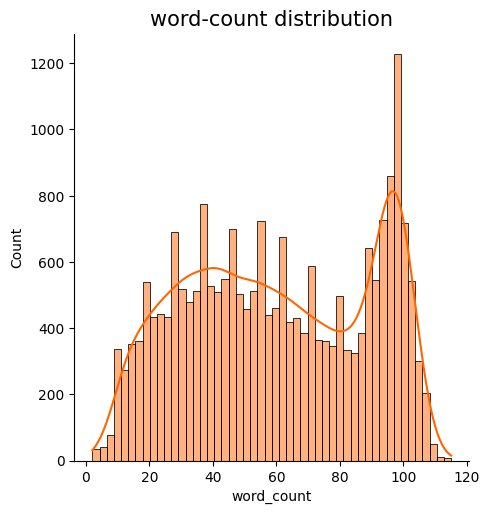

In [55]:
features = ['polarity','Age', 'review_len','word_count']
titles = ['polarity distribution','Age Distribution','review len distribution','word-count distribution']
colors = ['#9966ff','#3399ff','#00ff00','#ff6600']

for feature, title, color in zip(features,titles,colors):
    sns.displot(x = df[feature], bins = 50, color= color, kde = True)
    plt.title(title, size= 15)
    plt.xlabel(feature)
    plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Clothing ID              22628 non-null  int64  
 1   Age                      22628 non-null  int64  
 2   Review Text              22628 non-null  object 
 3   Rating                   22628 non-null  int64  
 4   Recommended IND          22628 non-null  int64  
 5   Positive Feedback Count  22628 non-null  int64  
 6   Division Name            22628 non-null  object 
 7   Department Name          22628 non-null  object 
 8   Class Name               22628 non-null  object 
 9   polarity                 22628 non-null  float64
 10  word_count               22628 non-null  int64  
 11  review_len               22628 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 2.7+ MB


# Rating Distribution

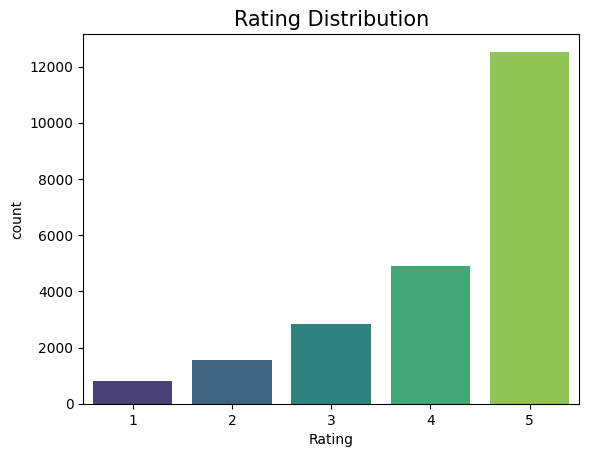

In [19]:
sns.countplot(x = 'Rating',palette='viridis',data = df )
plt.title('Rating Distribution', size = 15)
plt.xlabel('Rating')
plt.show()

# Division name Distribution

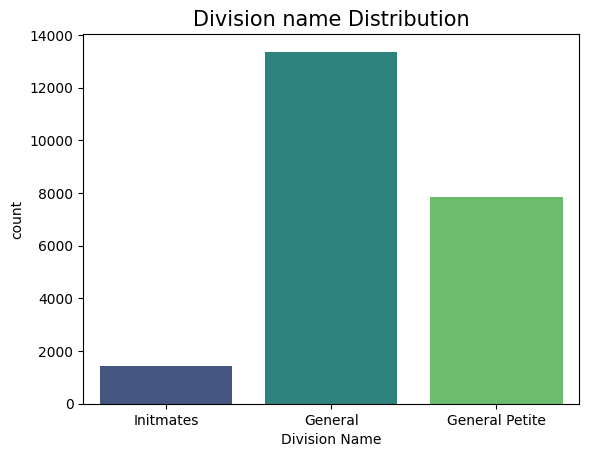

In [20]:
sns.countplot(x = 'Division Name', palette='viridis',data = df)
plt.title('Division name Distribution', size = 15)
plt.xlabel('Division Name')
plt.show()

# Department Name Distribution

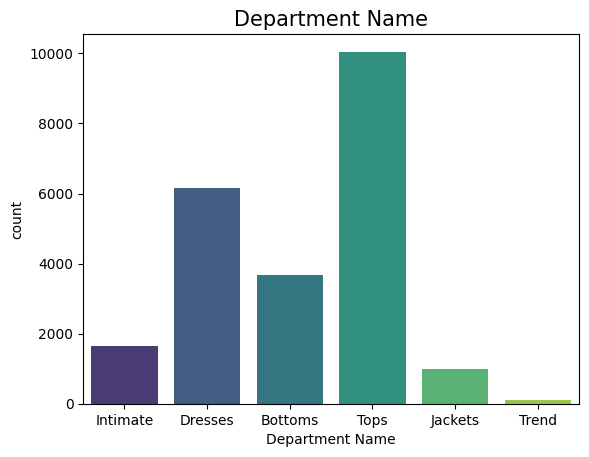

In [21]:
sns.countplot(x = 'Department Name', palette='viridis',data = df)
plt.title('Department Name',size = 15)
plt.xlabel('Department Name')
plt.show()

# Class name Distribution


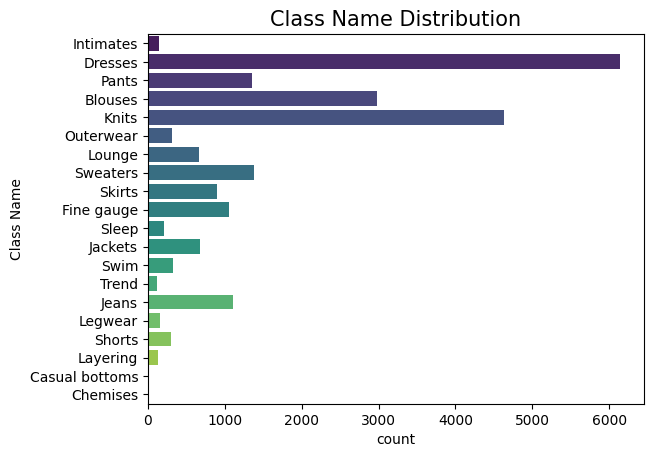

In [23]:
sns.countplot(y ='Class Name', palette  = 'viridis', data = df)
plt.title('Class Name Distribution', size = 15)
plt.show()

# Unigrams Bigrams Trigrams

In [24]:
def get_top_ngrams( corpus, ngram_range, stop_words= None, n=None):
    vec = CountVectorizer(stop_words= stop_words,ngram_range = ngram_range)
    bag_of_words = vec.fit_transform(corpus)
    
    sum_words = bag_of_words.sum(axis = 0)
    
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x:x[1], reverse = True)
    
    commom_words = words_freq[:n]
    words  = []
    freqs = []
    for word, freq in commom_words:
        words.append(word)
        freqs.append(freq)
        
    df = pd.DataFrame({'Words':words, 'Freqs':freqs})
    return df

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,polarity,word_count,review_len
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,8,53
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,62,303
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,98,500
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,22,124
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,36,192
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.552667,28,131
23482,862,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.091667,38,223
23483,1104,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.414286,42,208
23484,1084,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.322222,86,427


In [25]:
stop_words = None
n = 20
unigrams = get_top_ngrams(df['Review Text'],(1,1),stop_words,n)
bigrams = get_top_ngrams(df['Review Text'],(2,2), stop_words,n)
trigrams = get_top_ngrams(df['Review Text'],(3,3), stop_words,n)

In [33]:
unigrams

,Words,Freqs
0,the,76158
1,it,49273
2,and,48993
3,is,30636
4,this,25758
5,to,24577
6,in,20722
7,but,16549
8,on,15325
9,for,13994


In [26]:
stop_words = 'english'
n = 20
unigrams_st = get_top_ngrams(df['Review Text'], (1,1), stop_words,n)
bigrams_st = get_top_ngrams(df['Review Text'],(2,2), stop_words,n)
trigrams_st = get_top_ngrams(df['Review Text'], ( 3,3),stop_words , n)

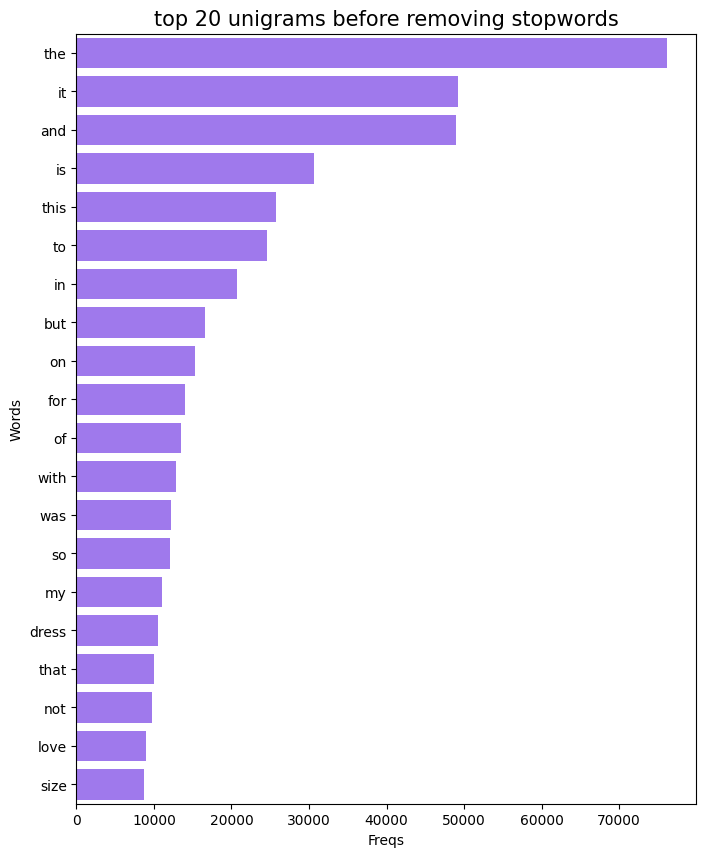

In [36]:
plt.figure(figsize=(8,10))
sns.barplot(x='Freqs',y = 'Words', color=colors[0], data=unigrams)
plt.title('top 20 unigrams before removing stopwords', size = 15)
plt.show()

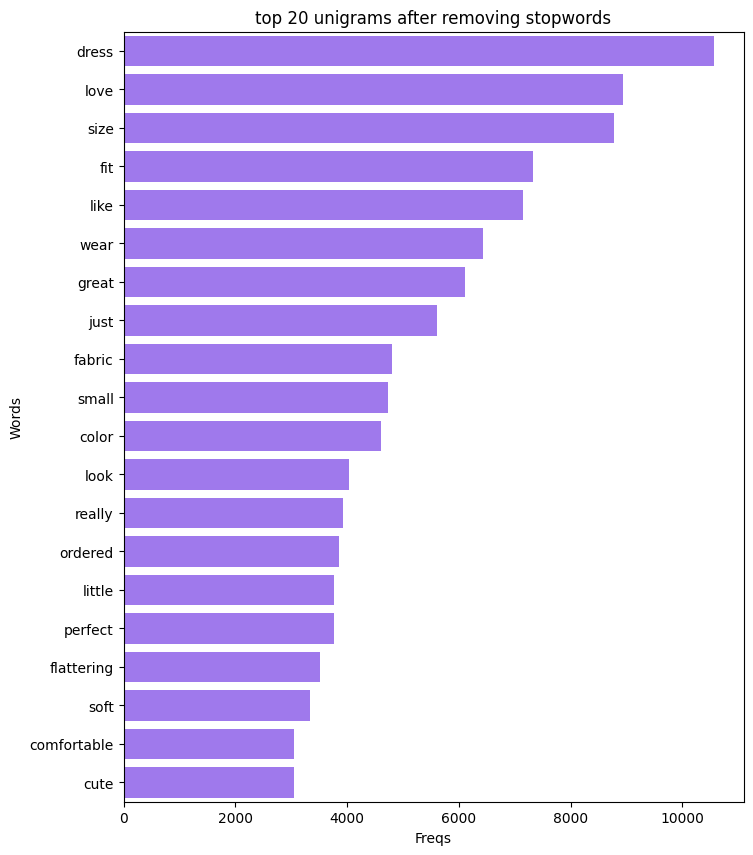

In [47]:
plt.figure(figsize=(8,10))
sns.barplot(x = 'Freqs', y = 'Words',color = colors[0],data = unigrams_st)
plt.title('top 20 unigrams after removing stopwords')
plt.show()

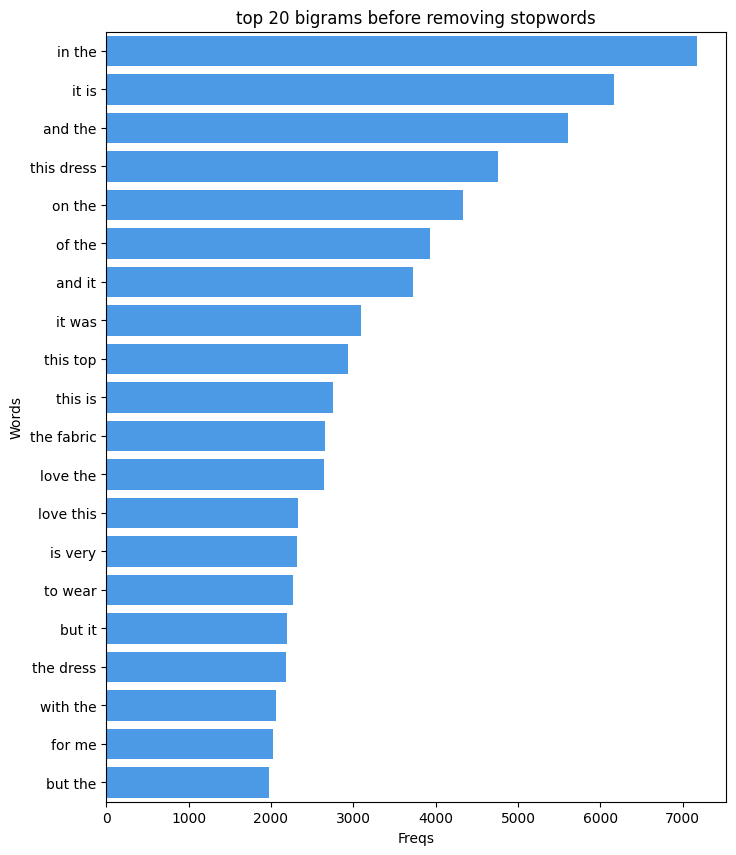

In [41]:
plt.figure(figsize=(8,10))
sns.barplot(x = 'Freqs', y = 'Words',color = colors[1],data = bigrams)
plt.title('top 20 bigrams before removing stopwords')
plt.show()

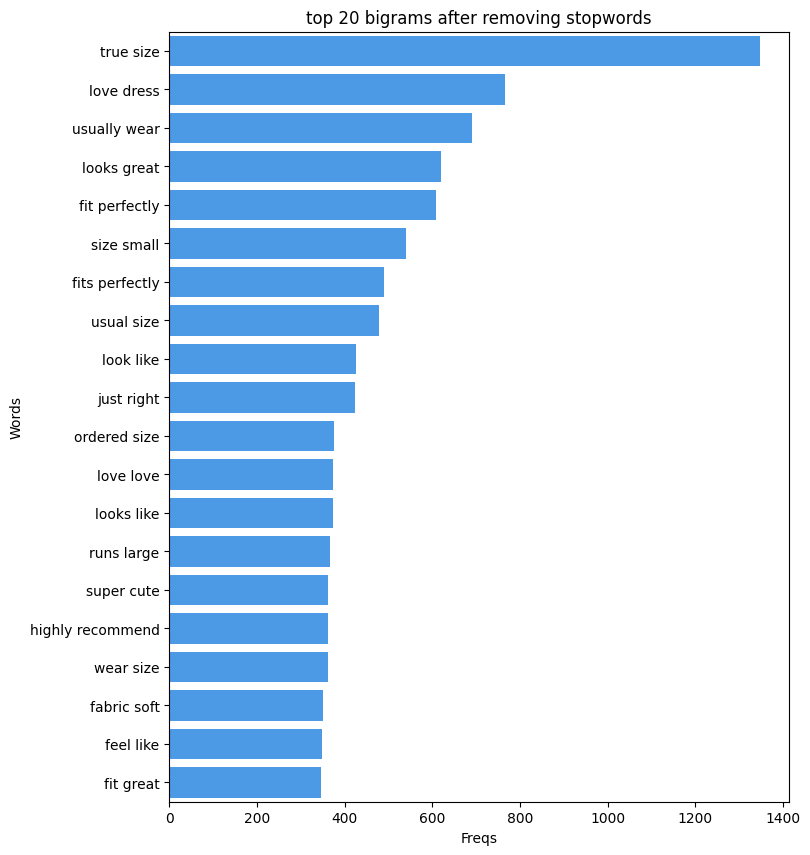

In [42]:
plt.figure(figsize=(8,10))
sns.barplot(x = 'Freqs', y = 'Words',color = colors[1],data = bigrams_st)
plt.title('top 20 bigrams after removing stopwords')
plt.show()

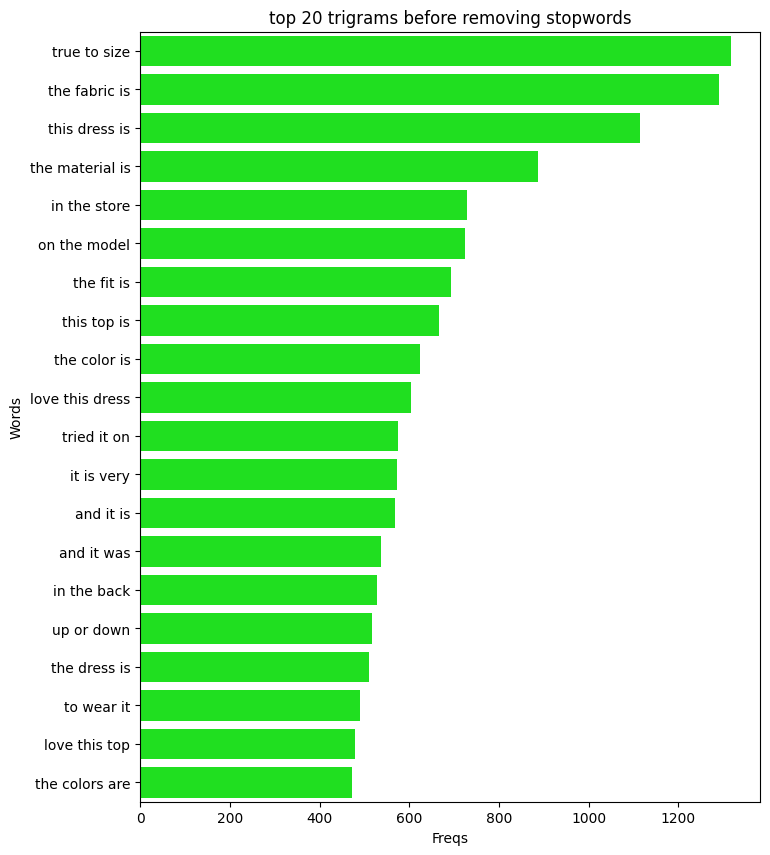

In [45]:
plt.figure(figsize=(8,10))
sns.barplot(x = 'Freqs', y = 'Words',color = colors[2],data = trigrams)
plt.title('top 20 trigrams before removing stopwords')
plt.show()

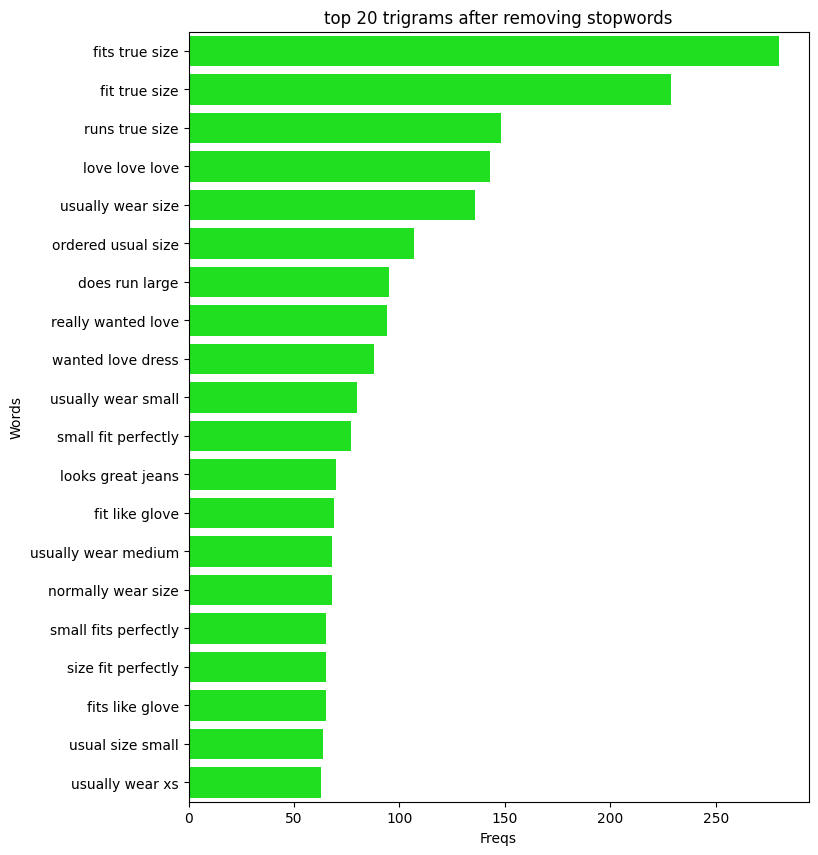

In [46]:
plt.figure(figsize=(8,10))
sns.barplot(x = 'Freqs', y = 'Words',color = colors[2],data = trigrams_st)
plt.title('top 20 trigrams after removing stopwords')
plt.show()